In [1]:
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt

df = read_csv('momentum_data.csv',skiprows=1,names=['t','v1','v2'])

In [2]:
df.describe()

,t,v1,v2
count,202.000000,202.000000,202.000000
mean,2.537500,0.031703,0.067885
std,1.461413,0.088430,0.119053
min,0.025000,-0.016000,-0.027000
25%,1.281250,-0.002000,0.000000
50%,2.537500,0.000000,0.006000
75%,3.793750,0.003000,0.049250
max,5.050000,0.325000,0.306000


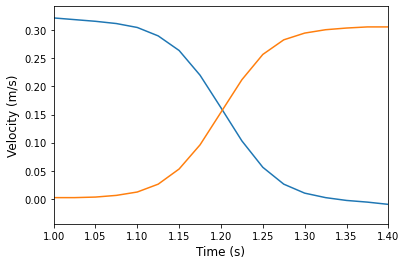

In [3]:
plt.plot(df.t,df.v1,'-')
plt.plot(df.t,df.v2,'-')
plt.xlim(1.0,1.4)
plt.xlabel('Time (s)',fontsize='large')
plt.ylabel('Velocity (m/s)',fontsize='large')
plt.savefig('collision.png')
plt.show()

In [4]:
df = df[(df.t > 1.0) & (df.t < 1.4)]

In [5]:
m1 = 0.4
m2 = 0.4
dm = 0.001
dv = 0.01

p1 = m1*df.v1
p2 = m2*df.v2

In [6]:
dp1 = p1*(dm/m1+dv/df.v1)
dp2 = p2*(dm/m2+dv/df.v2)

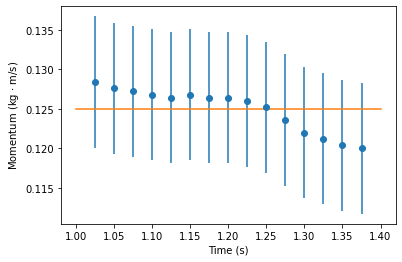

In [7]:
ptotal = p1+p2
dptotal = dp1+dp2

avgp = np.mean(ptotal)

plt.errorbar(df.t,ptotal,yerr=dptotal,fmt='o')
plt.plot([1.0,1.4],[avgp,avgp],'-')
plt.xlabel('Time (s)')
plt.ylabel('Momentum (kg $\cdot$ m/s)')
plt.savefig('momentum.png')
plt.show()

In [8]:
k1 = 0.5*m1*df.v1**2
k2 = 0.5*m2*df.v2**2
dk1 = df.v1**2 * dm/2. + p1*dv
dk2 = df.v2**2 * dm/2. + p2*dv

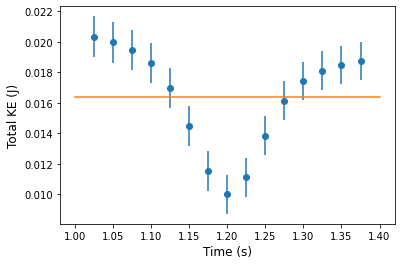

In [9]:
ktotal = k1+k2
dktotal = dk1+dk2

avgk = np.mean(ktotal)

plt.errorbar(df.t,ktotal,yerr=dktotal,fmt='o')
plt.plot([1.0,1.4],[avgk,avgk],'-')
plt.xlabel('Time (s)',fontsize='large')
plt.ylabel('Total KE (J)',fontsize='large')
plt.show()